<a href="https://colab.research.google.com/github/qua2000/oohpy/blob/main/OoH!Py_Python_for_KIds!_Vol_7_Linear_algebra_Matrix_Vector_Python_with_Colab!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**OoH!Py Python for Kids! Vol.7** 

# - **Linear algebra / Matrix / Vector** -  

#**Python with Colab!** 

---
# &#9830; Foreword

The title of this notebook is "Linear algebra (matrix/vector) for Kids", 

but there is not much explanation about what linear algebra, matrices, and vectors are.

(A little explanation is given in the last section,"★ Supplement".)

\

Above all, please play around with the Python code that comes out here.

\


The Python code that appears here is a sample, 

and I think there is code that can run faster, so please research it.

---
What is linear algebra?

\

It is enough to remember that it is a tool for moving game characters.

\

The characters in the game are actually moved by a program, 

and linear algebra is used in that program.

\

What's details of linear algebra?

\

In this notebook, we will study "Matrix" in linear algebra.

\

Mathematics that deals with matrices is called linear algebra.

\

A matrix is like a grid of numbers or symbols. 

\

Think of a grid like a tic-tac-toe board, where each little square can have a number or symbol in it.

\

For example, let's say you have a matrix that looks like this:

1 2 3\
4 5 6\
7 8 9

This is a 3$\times$3 matrix, which means it has 3 rows and 3 columns. 

\

You can think of each row as a horizontal line and each column as a vertical line.

\

That's all.

\


When creating a game, after deciding on the main character's character/avatar, 

you first determine the character's location by saying "start from this position".

\

If it were a real-life game, you would decide on the location with something like "start from here", 

but in games, this position is represented by a number.

\

Why use numbers?

\

Because numbers are easy to understand.

\

If you use "start from this point on the screen", 

it is not clear where that is, so it becomes anther question of "where?"

\


---
Linear algebra involves vectors and matrices.

\

You can think of vectors as "arrows" and matrices as "arrangements of numbers".

\

Remembering these basic concepts should be enough to get started.

\


It seems that linear algebra is taught as a subject in school, but for us, 

it is important to learn how to use linear algebra as a tool for creating games.

\

If you don't know how to use the tool, you can't create great things.

\

The mechanism for moving characters in a game is the same as that for moving robots.

\

Conversely, games can be said to have emerged from robotics.

\

Robots move using linear algebra.

\


Hardware is the physical equipment and the software is what runs it.

\

Linear algebra is used in software programs.

\

There is no need to learn linear algebra in the same way as in school.

\

It's enough to understand how it is used in software programs.

\


---
# &#9830; Examples of what linear algebra can do

---
Animation of an arrow arm with a joint

\


While it may not resemble the movements of a game character, 

this arm is also moved using code based on linear algebra. 

\

Linear algebra can be thought of as a tool for moving objects.

\

When you run the cell below, it will take a couple of minutes to run. 

\

Then, click on the $\blacktriangleright$"play" button in the Output to see the animation. 

\

The video screen will appear below the still image of the arm's initial 

position with the arrow.

\


In [ ]:
#@title
# 実行時間約1分

%matplotlib inline
import matplotlib.patches as pat
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML
import math

# グラフ領域作成
fig, ax = plt.subplots(figsize=(8, 8))

#数値設定
root3 = math.sqrt(3)

#初期設定
def initialize():
  ax.set_xlim(0, 10)
  ax.set_ylim(0, 10)
  ax.set_xticks(np.arange(0, 10, 1))
  ax.set_yticks(np.arange(0, 10, 1))
  ax.grid()

initialize()

#腕1ベクトル作成関数
def Quiver_A1(x,y,u,v):
  P = ax.quiver(x, y, u, v, color='green', width=0.01,  headwidth=0, headlength=0,
                headaxislength=0, angles='xy', scale_units='xy', scale=1)
  return P

#腕2ベクトル作成関数
def Quiver_A2(X,Y,U,V):
  Q = ax.quiver(X, Y, U, V, color='cyan', width=0.01, headwidth=8, headlength=2,
                headaxislength=6, angles='xy', scale_units='xy', scale=1)
  return Q

#回転行列(反時計回り)
def Rotate_Inv(t, z, w):
  sind = np.sin(np.deg2rad(t - z) * w)
  cosd = np.cos(np.deg2rad(t - z) * w)
  RI = np.array([[cosd, -sind],
                 [sind, cosd]])
  return RI

#回転行列(時計回り，4倍速)
def Rotate(t, z, w):
  sind = np.sin(np.deg2rad(t - z) * w)
  cosd = np.cos(np.deg2rad(t - z) * w)
  R = np.array([[cosd, sind],
                [-sind, cosd]])
  return R

#縮小行列(腕2だけ適用)
def Short(t, z):
  Short = np.array([[1-0.035*(t-z), 0],
                    [0, 1-0.035*(t-z)]])
  return Short


#拡大行列
def Long(t, z):
  Long = np.array([[1+0.05*(t-z), 0],
                   [0, 1+0.05*(t-z)]])
  return Long


#初期ベクトル設定
#腕1(Arm1)ベクトル
x = 1
y = 4
u = 3
v = 0
P = Quiver_A1(x,y,u,v)

#腕2(Arm2)ベクトル
X = 4
Y = 4
U = 2.5
V = 0
Q = Quiver_A2(X,Y,U,V)

plt.show()

#腕1,2の動き設定
def Arms(t):
  if 0<= t <= 30:
    z = 0
    w = 1
    x,y,u,v,X,Y,U,V = 1,4,3,0,4,4,2.5,0

    vect = np.array([u, v])
    RI = Rotate_Inv(t, z, w)
    vect = RI @ vect
    u = vect[0]
    v = vect[1]
    P.set_UVC(u,v)
    Quiver_A1(x,y,u,v)

    S = np.array([X, Y]) - np.array([1, 4])
    S = RI @ S + np.array([1, 4])
    X = S[0]
    Y = S[1]
    Vect = np.array([U, V])
    Vect = RI @ Vect
    U = Vect[0]
    V = Vect[1]
    Q.set_UVC(U,V)
    Quiver_A2(X,Y,U,V)

  elif 30<= t <=60:
    z = 30
    w = 1
    x,y,u,v,X,Y,U,V = 1,4,1.5*root3,1.5,1+1.5*root3,5.5,1.25*root3,1.25

    vect = np.array([u, v])
    R = Rotate(t, z, w)
    vect = R @ vect
    u = vect[0]
    v = vect[1]
    P.set_UVC(u,v)
    Quiver_A1(x,y,u,v)

    S = np.array([X, Y]) - np.array([1, 4])
    S = R @ S + np.array([1, 4])
    X = S[0]
    Y = S[1]
    Vect = np.array([U, V])
    Vect = R @ Vect
    U = Vect[0]
    V = Vect[1]
    Q.set_UVC(U,V)
    Quiver_A2(X,Y,U,V)

  elif 60<= t <=75:
    z = 60
    x,y,u,v,X,Y,U,V = 1,4,3,0,4,4,2.5,0

    Quiver_A1(x,y,u,v)

    Vect = np.array([U, V])
    L = Long(t, z)
    Vect = L @ Vect
    U = Vect[0]
    V = Vect[1]
    Q.set_UVC(U,V)
    Quiver_A2(X,Y,U,V)

  elif 75<= t <=90:
    z = 75
    x,y,u,v,X,Y,U,V = 1,4,3,0,4,4,4.75,0

    Quiver_A1(x,y,u,v)

    Vect = np.array([U, V])
    S = Short(t, z)
    Vect = S @ Vect
    U = Vect[0]
    V = Vect[1]
    Q.set_UVC(U,V)
    Quiver_A2(X,Y,U,V)

  elif 90<= t <=180:
    z = 90
    x,y,u,v,X,Y,U,V = 1,4,3,0,4,4,2.5,0

    Quiver_A1(x,y,u,v)

    Vect = np.array([U, V])
    w = 4
    R = Rotate(t, z, w)
    Vect = R @ Vect
    U = Vect[0]
    V = Vect[1]
    Q.set_UVC(U,V)
    Quiver_A2(X,Y,U,V)

  elif 180<= t <= 211:
    z = 180
    w = 1
    x,y,u,v,X,Y,U,V = 1,4,3,0,4,4,2.5,0

    Quiver_A1(x,y,u,v)

    RI = Rotate_Inv(t, z, w)
    Vect = np.array([U, V])
    Vect = RI @ Vect
    U = Vect[0]
    V = Vect[1]
    Q.set_UVC(U,V)
    Quiver_A2(X,Y,U,V)
  #腕1，2が同時に30度反時計回り
  elif 211<= t <= 241:
    z = 211
    w = 1
    x,y,u,v,X,Y,U,V = 1,4,3,0,4,4,1.25*root3,1.25

    vect = np.array([u, v])
    RI = Rotate_Inv(t, z, w)
    vect = RI @ vect
    u = vect[0]
    v = vect[1]
    P.set_UVC(u,v)
    Quiver_A1(x,y,u,v)

    S = np.array([X, Y]) - np.array([1, 4])
    S = RI @ S + np.array([1, 4])
    X = S[0]
    Y = S[1]
    Vect = np.array([U, V])
    Vect = RI @ Vect
    U = Vect[0]
    V = Vect[1]
    Q.set_UVC(U,V)
    Quiver_A2(X,Y,U,V)
  #腕2が伸びながら330度反時計回り(10倍速)
  elif 241<= t <= 275:
    z = 241
    w = 10
    x,y,u,v,X,Y,U,V = 1,4,1.5*root3,1.5,1+1.5*root3,5.5,1.25,1.25*root3

    Quiver_A1(x,y,u,v)

    #伸びながら330度反時計回り回転
    RI = Rotate_Inv(t, z, w)
    L = Long(t, z)
    Vect = np.array([U, V])
    Vect = RI @ L @ Vect
    U = Vect[0]
    V = Vect[1]
    Q.set_UVC(U,V)
    Quiver_A2(X,Y,U,V)


#up-date関数
def update(frame):
  ax.cla()
  initialize()

  t = frame

  Arms(t)


#アニメーション作成
#ani = animation.FuncAnimation(fig, update, fargs=(P, x, y, Q, X, Y), interval=200, frames=61, repeat=False)
ani = animation.FuncAnimation(fig, update, interval=200, frames=275, repeat=False)
HTML(ani.to_html5_video())



---
The following animation is a train traveling around a rectangle.

\

When you run ▶ the cell below, it will take about 1 minute to complete.

\

Let's run the animation screen that appears and see how it moves.


In [ ]:
#@title

%matplotlib inline
import matplotlib.patches as pat
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
#自分で追加
from IPython.display import HTML

# グラフ領域作成
fig, ax = plt.subplots(figsize=(11, 6))
#ax.set_xlim(0, 20)
#ax.set_ylim(0, 4)
#plt.axis('scaled')

# 初期設定をinitialize()という関数にする

def initialize():
  ax.set_xticks(np.arange(0, 21, 1))
  ax.set_yticks(np.arange(0, 11, 1))
  ax.grid()

  #電車が通る長方形(Rail)作成，左上から反時計回りでA,B,C,D
  A = np.array([3,8])
  B = np.array([3,2])
  C = np.array([17,2])
  D = np.array([17,8])

  Rail = pat.Polygon(xy = [A,B,C,D], edgecolor='black', facecolor='white', linewidth=1.6)

  ax.add_patch(Rail)

initialize()

# 電車の動きをすべてMoveTrain(x)関数にする
def moveTrain(x):
  #初期設定をif文のx == 0に入れた
  if 0<= x <15:
    P = np.array([2,8]) + np.array([1,0])*x*velocity
    Q = np.array([P[0]+2,P[1]])
    R = np.array([P[0]+1.5,P[1]+0.5])
    S = np.array([P[0],P[1]+0.5])
    Train = pat.Polygon(xy=[P,Q,R,S], fc='cyan', ec='black', linewidth='2.5',
                        alpha=0.5, fill=True)
    return ax.add_patch(Train)
  #elif 15<= x <31:
    #P = np.array([17,8])
  elif 24<= x <=30:
    P = np.array([17,8]) + np.array([0,-1])*(x-24)*velocity
    Q2 = np.array([P[0],P[1]-2])
    R2 = np.array([P[0]+0.5,P[1]-1.5])
    S2 = np.array([P[0]+0.5,P[1]])
    Train = pat.Polygon(xy=[P,Q2,R2,S2], fc='cyan', ec='black', linewidth='2.5',
                        alpha=0.5, fill=True)
    return ax.add_patch(Train)

  elif 33<= x <=48:
    P = np.array([17,2]) + np.array([-1,0])*(x-33)*velocity
    Q3 = np.array([P[0]-2,P[1]])
    R3 = np.array([P[0]-1.5,P[1]-0.5])
    S3 = np.array([P[0],P[1]-0.5])
    Train = pat.Polygon(xy=[P,Q3,R3,S3], fc='cyan', ec='black', linewidth='2.5',
                        alpha=0.5, fill=True)
    return ax.add_patch(Train)
  #else:
    #return P

#電車の速度(velocity)は秒速1mとし、描画間隔(timestep)は0.1秒とする。
velocity = 1.0
step = 0.1

def update(t):
    ax.cla()
    initialize()
    x = step * t
    #moveTrain(x)

    if 3<= x < 10:
      # 拡大行列L
      L = np.array([[2, 0],
                    [0, 2]])
      P = np.array([2,8]) + np.array([1,0])*x*velocity
      Q = np.array([P[0]+2,P[1]])
      R = np.array([P[0]+1.5,P[1]+0.5])
      S = np.array([P[0],P[1]+0.5])
      QL = P + L @ (Q - P)
      RL = P + L @ (R - P)
      SL = P + L @ (S - P)
      Train = pat.Polygon(xy=[P,QL,RL,SL], fc='cyan', ec='black', linewidth='2.5',
                          alpha=0.5, fill=True)
      ax.add_patch(Train)

    #elif 10<= x <15:
      #moveTrain(x)

    elif 15<= x <=24:
      # 回転行列Rotate(時計回り)
      sind = np.sin(np.deg2rad(t-150))
      cosd = np.cos(np.deg2rad(t-150))
      Rotate = np.array([[cosd, sind],
                         [-sind, cosd]])
      #Q,R,Sを回転させてTrain作成
      #global P,Q,R,S
      P = np.array([17,8])
      Q = np.array([P[0]+2,P[1]])
      R = np.array([P[0]+1.5,P[1]+0.5])
      S = np.array([P[0],P[1]+0.5])
      Q = P + Rotate @ (Q - P)
      R = P + Rotate @ (R - P)
      S = P + Rotate @ (S - P)
      Train = pat.Polygon(xy=[P,Q,R,S], fc='cyan', ec='black', linewidth='2.5',
                          alpha=0.5, fill=True)
      ax.add_patch(Train)

    elif 30<= x <=33:
      # 回転行列Rotate(時計回り)回転速度3倍
      sind = np.sin(np.deg2rad(t-300)*3)
      cosd = np.cos(np.deg2rad(t-300)*3)
      Rotate = np.array([[cosd, sind],
                         [-sind, cosd]])
      #Q,R,Sを回転させてTrain作成
      #global P,Q,R,S
      P = np.array([17,2])
      Q = np.array([P[0],P[1]-2])
      R = np.array([P[0]+0.5,P[1]-1.5])
      S = np.array([P[0]+0.5,P[1]])
      Q = P + Rotate @ (Q - P)
      R = P + Rotate @ (R - P)
      S = P + Rotate @ (S - P)
      Train = pat.Polygon(xy=[P,Q,R,S], fc='cyan', ec='black', linewidth='2.5',
                          alpha=0.5, fill=True)
      ax.add_patch(Train)

    elif 39<= x <43:
      # 縮小行列
      Z = np.array([[0.7, 0],
                    [0, 0.7]])
      P = np.array([17,2]) + np.array([-1,0])*(x-33)*velocity
      Q = np.array([P[0]-2,P[1]])
      R = np.array([P[0]-1.5,P[1]-0.5])
      S = np.array([P[0],P[1]-0.5])
      Q = P + Z @ (Q - P)
      R = P + Z @ (R - P)
      S = P + Z @ (S - P)
      Train = pat.Polygon(xy=[P,Q,R,S], fc='cyan', ec='black', linewidth='2.5',
                          alpha=0.5, fill=True)
      ax.add_patch(Train)

    else :
      moveTrain(x)

ani = animation.FuncAnimation(fig, update, interval=200, frames=461, repeat=False)
HTML(ani.to_html5_video())


---
Displaying below an animation of a polygon in the shape of an arrow.

\

When you run the cell below, it will take about 3 minutes to complete. 

\

Then, click on the $\blacktriangleright$"play" button in the Output section to see the animation.

\
Click $\blacktriangleright$play button in the video to move animation.

\

In the output a still image of the polygon appear first 

\

and the video will appear below the still image.

\


In [ ]:
#@title

%matplotlib inline
import matplotlib.patches as pat
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
#自分で追加
from IPython.display import HTML

# グラフ領域作成
fig, ax = plt.subplots(figsize=(8, 8))

#初期設定
def initialize():
  ax.set_xlim(0, 10)
  ax.set_ylim(0, 10)
  ax.set_xticks(np.arange(0, 10, 1))
  ax.set_yticks(np.arange(0, 10, 1))
  ax.grid()

initialize()

#初期ベクトル設定
X = 1
Y = 7
s = np.array([X, Y])
U = 2
V = 2
v0 = np.array([U, V])
Q = ax.quiver(X, Y, U, V, color='cyan', width=0.1,  headwidth=1, headlength=0.5,
              angles='xy', scale_units='xy', scale=1)
plt.show()

#ベクトル作成関数
def Quiver(X,Y,U,V):
  Q = ax.quiver(X, Y, U, V, color='cyan', width=0.1,  headwidth=1, headlength=0.5,
                angles='xy', scale_units='xy', scale=1)
  return Q

#up-date関数
def update(frame, Q, X, Y):
  ax.cla()
  initialize()

  if (0<= frame <=121):
    X = X + frame*0.05
    Y = Y
    if 20< frame <=70:
# 縮小行列c 対称がベクトルなので縮小ではなく短縮になる
      c = np.array([[0.5, 0],
                    [0, 0.5]])
      v1 = c @ v0
      U = v1[0]
      V = v1[1]

    else:
      U = v0[0]
      V = v0[1]

    Q.set_UVC(U,V)
    Quiver(X,Y,U,V)

#180度回転，回転行列Rotate(反時計回り)
  elif 121<= frame <=302:
    X = 7
    Y = 7
    sind = np.sin(np.deg2rad(frame-121))
    cosd = np.cos(np.deg2rad(frame-121))
    Rotate = np.array([[cosd, -sind],
                       [sind, cosd]])
    vr = Rotate @ v0
    U = vr[0]
    V = vr[1]
    Q.set_UVC(U,V)
    Quiver(X,Y,U,V)

#(x, Y) = (7, 7)から(5, 5)まで直進
  elif 302< frame <=343:
    X = 7 - (frame - 302) * 0.05
    Y = 7 - (frame - 302) * 0.05
    U = -2
    V = -2
    Quiver(X,Y,U,V)

#2回転，回転行列Rotate2(時計回り)
  elif 343<= frame <=525:
    X = 5
    Y = 5
    U = -2
    V = -2
    vr = np.array([U, V])
    sind = np.sin(np.deg2rad(frame-344) * 4)
    cosd = np.cos(np.deg2rad(frame-344) * 4)
    Rotate2 = np.array([[cosd, sind],
                       [-sind, cosd]])
    vr2 = Rotate2 @ vr
    U = vr2[0]
    V = vr2[1]
    Q.set_UVC(U,V)
    Quiver(X,Y,U,V)

  elif 525< frame <=566:
    X = 5 - (frame - 525) * 0.05
    Y = 5 - (frame - 525) * 0.05
    U = -2
    V = -2
    Quiver(X,Y,U,V)

#(2, 2)を中心に180度回転＝点対称移動，回転行列Rotate3(反時計回り)
  elif 566< frame <=627:
    X = 3
    Y = 3
    U = -2
    V = -2
    vrxy = np.array([X, Y]) - np.array([2, 2])
    vruv = np.array([U, V])
    sind = np.sin(np.deg2rad(frame-566) * 3)
    cosd = np.cos(np.deg2rad(frame-566) * 3)
    Rotate3 = np.array([[cosd, -sind],
                        [sind, cosd]])
    #原点を中心に回転させてから元に戻す
    vrxy2 = Rotate3 @ vrxy + np.array([2, 2])
    X = vrxy2[0]
    Y = vrxy2[1]
    vruv2 = Rotate3 @ vruv
    U = vruv2[0]
    V = vruv2[1]
    Q.set_UVC(U,V)
    Quiver(X,Y,U,V)

#(X, Y) = (7, 1)まで平行移動
  elif 627< frame <=648:
    X, Y = 1, 1
    U, V = 2, 2
    X = X + (frame - 627) * 0.3
    Y = Y
    Quiver(X,Y,U,V)

#(6, 4)を中心に180度回転，回転行列Rotate4(反時計回り)
  elif 648< frame <=709:
    X = 7
    Y = 1
    U = 2
    V = 2
    vrxy = np.array([X, Y]) - np.array([6, 4])
    vruv = np.array([U, V])
    sind = np.sin(np.deg2rad(frame-648) * 3)
    cosd = np.cos(np.deg2rad(frame-648) * 3)
    Rotate4 = np.array([[cosd, -sind],
                        [sind, cosd]])
    #原点を中心に回転させてから元に戻す
    vrxy2 = Rotate4 @ vrxy + np.array([6, 4])
    X = vrxy2[0]
    Y = vrxy2[1]
    vruv2 = Rotate4 @ vruv
    U = vruv2[0]
    V = vruv2[1]
    Q.set_UVC(U,V)
    Quiver(X,Y,U,V)

#直線y＝xに対しての線対称移動
  elif 709< frame <=740:
    #y＝xのグラフの描画
    x = np.arange(0, 10, 0.1)
    y = x
    ax.plot(x, y)
    ax.quiver(4.5, 5.5, 1, -1.25, color="black", width=0.003, headwidth=7,
              angles='xy', scale_units='xy', scale=1)
    ax.quiver(5, 7, -2, -2, color='cyan', width=0.1,  headwidth=1, headlength=0.5,
                  angles='xy', scale_units='xy', scale=1)
    if 719< frame <=740:
      X = 5
      Y = 7
      U = -2
      V = -2
      vmxy = np.array([X, Y])
      #線対称移動用Mirror行列
      Mirror = np.array([[0, 1],
                         [1, 0]])
      #線対称移動
      vmxy2 = Mirror @ vmxy
      X = vmxy2[0]
      Y = vmxy2[1]
      Quiver(X,Y,U,V)


#アニメーション作成
ani = animation.FuncAnimation(fig, update, fargs=(Q,X,Y), interval=50, frames=740, repeat=False)

# Display方法その1
HTML(ani.to_html5_video())

# Display方法その2(こちらにする場合は，上のHTML()は # にする)
#html = ani.to_jshtml()
#HTML(html)


---
# &#9830; x-y coordinates

First, let's review coordinates. 

\

The reason we review coordinates is that when we consider the motion of a robot, 

the starting point is determined by the position of the robot's parts such as 

hands and feet. 

\
We determine the origin of the robot's movement by deciding on the coordinates 

that serve as the reference point and we express the position of each part of 

the robot in coordinates. 

\

The coordinates serve as the basis for the robot's movement.

\
By the way, speaking of movements, rotations, scaling, and other movements 

can be represented using linear algebra.

\




If the infield of a baseball field is represented by an xy-coordinate system, 

with home plate as the origin (0, 0), then first base is roughly 

90 feet (about 27 meters) away, 

so first base can be approximately represented by the coordinate (90, 0), 

second base by (90, 90), and third base by (0, 90).

\


---
An example where coordinates are used is "Go".

\

The positions of white and black go stones are represented by coordinates.

\

When you execute the cell below, "Black: 17-3" and "White: 4-16" are displayed.

\


(Attention)

Before run the "Go" cell, run$\blacktriangleright$ as Japanese numbers to be 

displayed are included.

In [ ]:
!pip install japanize-matplotlib
import japanize_matplotlib 

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

fig, ax = plt.subplots(figsize=(6, 6))

xticks = np.arange(0,19,1)
yticks = np.arange(0,19,1)
ax.set_xticks(xticks)
ax.set_yticks(yticks)

x_labels = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19"]
ax.set_xticklabels(x_labels)
ax.xaxis.tick_top()

y_labels = ['十九','十八','十七','十六','十五','十四','十三','十二','十一','十','九','八','七','六','五','四','三','二','一',]
ax.set_yticklabels(y_labels)

c = patches.Circle((16,16), 0.5, facecolor="black", edgecolor="black")
ax.add_patch(c)

d = patches.Circle((3,3), 0.5, facecolor="white", edgecolor="black")
ax.add_patch(d)

ax.text(16, 16, "1", fontsize="x-large", fontweight="bold", color="white", ha="center", va="center_baseline")
ax.text(3, 3, "2", fontsize="x-large", fontweight="bold", color="black", ha="center", va="center_baseline")

ax.set_aspect('equal')

ax.grid(color="black", alpha=1, linewidth=1)
ax.set_axisbelow(True)

plt.show()



---
If you have little idea of xy-coordinates, review with Vol.3.

OoH!Py Python for Kids Vol.3 ---> [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1tkC931X47iOiuBz1wpZ3-vlIa9r4Ll3I?usp=sharing)

\

Below is an explanation of xy-coordinates in Vol.3.

---
Run $\blacktriangleright$ the code below 

You learned the number line at school.

Coordinates are what two number lines intersect vertically at 0.

The horizontal straight line is called the x-axis 

and the vertical straight line is called the y-axis.

Coordinates allow you to represent points on a plane 

as well as on a straight line.

A point in the figure below is expressed as "x coordinate is 4, y coordinate is 3" 

and is expressed as `(x, y) = (4, 3)`.

At first, let's remember coordinates and how to represent  points (positions).



In [ ]:

# Import modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat
# Create Axes object
fig, ax = plt.subplots(figsize=(6, 6))

# x, y axis scale setting
ax.set_xlim(-2, 6)
ax.set_ylim(-2, 6)
ax.set_aspect('equal')
# Set the grid
ax.grid()
# Set title
ax.set_title("xy coodinates", fontsize = 16)

# Create x,y coordinates
ax.annotate(' ', xy = (0, 6), size = 5, xytext = (0, -2),
            arrowprops=dict(width=0.5, headwidth=5, headlength=10))
ax.annotate(' ', xy = (6, 0), size = 5, xytext = (-2, 0),
            arrowprops=dict(width=0.5, headwidth=5, headlength=10))
# Add text of O, x, y
ax.text(-0.4, -0.4, "O",  fontweight="bold", fontstyle="italic", fontsize=14) 
ax.text(5.6, -0.4, "x",  fontweight="bold", fontstyle="italic", fontsize=14) 
ax.text(-0.4, 5.6, "y",  fontweight="bold", fontstyle="italic", fontsize=14) 
# Plot point
ax.plot(4, 3, 'o')

plt.show()

---
# &#9830; Practice of displaying points on the xy-coordinates

This is a practice of displaying points on the xy-coordinate.

Please display the coordinates of the points A(4, 3), B(0, -3), C(-5, 1), and D(-2,-5).



In [ ]:

# Import modules
import numpy as np
import matplotlib.pyplot as plt

# Create Axes object
fig, ax = plt.subplots(figsize=(6, 6))

# x, y axis scale setting
ax.set_xticks([-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6])
ax.set_yticks([-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6])
# Set the maximum/minimum value of the axis
ax.set_xlim(-6, 6, 1)
ax.set_ylim(-6, 6, 1)
# Set the grid
ax.grid()
# Set the title of the graph
ax.set_title("xy coordinates", fontsize = 16)

# Create xy-coordinates
ax.annotate(' ', xy = (0, 6), size = 5, xytext = (0, -6),
            arrowprops=dict(width=0.5, headwidth=5, headlength=10))
ax.annotate(' ', xy = (6, 0), size = 5, xytext = (-6, 0),
            arrowprops=dict(width=0.5, headwidth=5, headlength=10))

# Add text of O, x, y
ax.text(-0.5, -0.5, "O",  fontweight="bold", fontstyle="italic", fontsize=14)
ax.text(5.6, -0.4, "x",  fontweight="bold", fontstyle="italic", fontsize=14)
ax.text(-0.4, 5.6, "y",  fontweight="bold", fontstyle="italic", fontsize=14)

# Plot coordinates of A,B,C,D
ax.plot(4, 3, 'o', color="blue")
ax.annotate('A', xy = (4.1, 3.1), size=14)

ax.plot(0, -3, 'o', color="red")
ax.annotate('B', xy = (0.1, -2.8), size=14)

ax.plot(-5, 1, 'o', color="green")
ax.annotate('C', xy = (-4.9, 1.1), size=14)

ax.plot(-2, -5, 'o', color="cyan")
ax.annotate('D', xy = (-1.9, -4.9), size=14)

# Display
plt.show()

---
# &#9830; Matplotlib / Numpy

In this Note we use Matplotlib and Numpy which are already explained in Vol.1 and 3.

Vol.1---> [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1YrP2S-kpEKzaham3d4s7mq0Rsf0qUP7h?usp=sharing)


Vol.3 ---> [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1tkC931X47iOiuBz1wpZ3-vlIa9r4Ll3I?usp=sharing)



---
# &#9830; Line segment

What is Line segment? ---> 「[Terms](#Terms-id)」

I will explain how to draw a line segment using Matplotlib 

because we will move line segments and vectors with Python.

In Matplotlib, if you determine two points A and B and plot them, 

it will automatically connect them with a line.

\

Plot by putting in the coordinates of points A and B:

    A = [2, 5]
    B = [5, 8]
    ax.plot(A, B)

Coordinates are written in list format ([&emsp; ]).

\

Tuples( ) are also OK, but since variables are often input, lists are recommended.

\


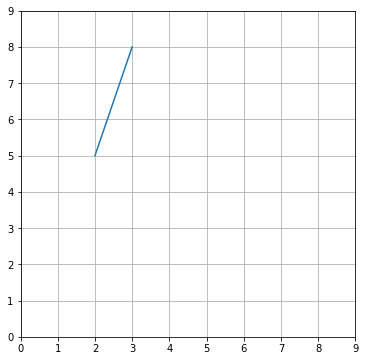

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create Axes object
fig, ax = plt.subplots(figsize=(6,6))
 
# Set the maximum/minimum value of the axis
ax.set_xlim(0, 9)
ax.set_ylim(0, 9)
#ax.set_aspect('equal') 

# Set the grid
ax.grid()

# Determine coordinate of A and B
A = [2,3]
B = [5,8]
ax.plot(A, B)

# Alternative
#ax.plot([2, 5], [3, 8]) is OK

# Display
plt.show()

---
# &#9830; Move Line segment

To move a line segment, you don't need to use linear algebra 

(although please refer to the \<Reference\> below). 

\


You can simply perform addition and subtraction on the x and y coordinates 

to calculate how much to move.

\


To draw an arrow indicating movement, use the `quiver()` function, 

which is located in `matplotlib.pyplot`.


(For your reference) [Matplotlib Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html)


The notation is quiver(x, y, u, v, other parameters).

\

The x and y inside the parentheses represent the x and y coordinates 

of the starting point of the arrow.

\

u and v represent the direction of the arrow.

\

`quiver()` function is also used to display vectors, 

so we will explain it again in the section on 'Vector'.

\


---
---
< Reference >

There is matrix that can perform translations, 

but it will not be covered in this note.

\

It is briefly introduced in "&#9830; [Matrix Explanation](#MatrixExplanation-id)" below.

---
---

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlim(0, 9)
ax.set_ylim(0, 9)
#ax.set_aspect('equal') 

x = [2,5]
y = [5,8]
ax.plot(x, y)

# Set movement formula
x1 = [x[0]+3, x[1]+3]
y1 = [y[0]-2, y[1]-2]
ax.plot(x1, y1)

# Display an arrow indicating movement
ax.quiver(4, 6, 2, -1, color="black", width=0.005, angles='xy', scale_units='xy', scale=1)

plt.show()

You can redraw using the assigned x and y without using x1 and y1.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlim(0, 9)
ax.set_ylim(0, 9)

x = [2,5]
y = [5,8]
ax.plot(x, y, color='green')

# Re-assign to x and y
x = [x[0]+3, x[1]+3]
y = [y[0]-2, y[1]-2]
ax.plot(x, y, color='red')

ax.quiver(4, 6, 2, -1, color="black", width=0.005,
          angles='xy', scale_units='xy', scale=1)

plt.show()

<a name="Vector-id"></a>

---
# &#9830; Vector

Vector is a "geometric object that has magnitude (or length) and direction"

such as velocity, force, wind (wind direction), etc.

\

Velocity has both magnitude and direction, 

but speed only represents the magnitude which is not a vector.

\

When a point moves, "the amount and direction of the position change" 

(displacement) is also a vector.

\

To represent a vector, use an arrow symbol (or directed line).

\


Vectors are created with `quiver()` introduced above.

The bottom (left side) of the arrow(--->) is called the `initial(start) point`, 

and the tip (right side) is called the `terminal(end) point`.

\

The black vector below starts at the point (1, 2) and points 3 to the right and 2 to the top, 

so expressed as `quiver(x, y, u, v)` = `quiver(1, 2, 3, 2)`.

\

This is what I said above that u and v represent directions.

\

Red vector, starting at point (7, 8), oriented 5 left, 2 down, 

so `quiver(x, y, u, v)` = `quiver(7, 8, -5, -2 )`.

\

The direction is $+$ (plus) for right, top and $-$ (minus) for left, bottom.

\

In addition, absolute value of u and v also know the size of the vector.

As for absolute value see Vol.1 --->  [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1YrP2S-kpEKzaham3d4s7mq0Rsf0qUP7h?usp=sharing)

---
As explained later again in "* Scaling up and down of vectors", 

vectors are expressed as `np.array([4, 3])` using the `array()` function of Numpy.

\


It's confusing, but the xy coordinate point(4, 3) is also expressed as `np.array([4, 3])`, 

so let's use the point or vector depending on the variable to be substituted.

\

Variables in the case of vectors often use the English initial `v`.

For example, `v = np.array([4, 3])`.

\

In `[4, 3]`, `4` represents the left-right direction (= along the x-axis), 
  
so `x component/element of the vector`, 

`3` represents the up-down direction (= along the y-axis) direction), 

so it is called the `y component/element of the vector`.

\


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(0, 9)
ax.set_ylim(0, 9)

ax.grid()

# Create vector with quiver()
# Black vector
ax.quiver(1, 2, 3, 2, color="black", width=0.005,
          angles='xy', scale_units='xy', scale=1)

# Red vector
ax.quiver(7, 8, -5, -2, color="red", width=0.02,
          angles='xy', scale_units='xy', scale=1)

plt.show()

---
If it is a line segment, it cannot be transformed or displaced using a matrix,

so let's express the vector in the form of a line segment without arrows.

\

You can leave it as a vector with arrow style, 

but I also made a shape without arrow, let me introduce it.

\


There are color, width, angles, etc. as parts of parameters 

other than the start point and direction of quiver(), 

but if setting width=0.01, headwidth=1, headlength=1, 

the arrow at the top of the vector will disappear, so looks like a line segment.

\


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlim(0, 9)
ax.set_ylim(0, 9)
ax.grid()

# width = bold of the line (default＝0.005)
# Black vector
ax.quiver(1, 6, 2, 2, color="black", width=0.005,
          angles='xy', scale_units='xy', scale=1)

# headwidth=Width of arrow(minimum is 1)(Default＝3)
# headlength=Sharpness of arrow(minimum is 1)(Default＝4.5)
# Red vector
ax.quiver(2, 5, 2, 2, color="red", width=0.01, headwidth=1, headlength=1,
          angles='xy', scale_units='xy', scale=1)

plt.show()

---
# &#9830; Vector translation

Vector translation doesn't use linear algebra, but translation itself is 

an important basic motion.

\

The starting point is expressed as an array with the numpy `array()` function, 

and it is put in the variable `a`.

\

A vector is represented by `quiver(a[0], a[1], u, v)`.

\

Add 2 to the first element `a[0]` of variable `a`, which is the x-coordinate,

 to translate 2 right and 3 down.

     a[0] += 2

Subtract 3 from the second element `a[1]` of variable `a` which is the y coordinate.

     a[1] -= 3

\

The vector after movement is displayed again.

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlim(0, 9)
ax.set_ylim(0, 9)
ax.grid()

# Initial point
a = np.array([2, 5])

# Movement(2 to right and 2 to upside)
u = 2
v = 2
ax.quiver(a[0], a[1], u, v, color="black", width=0.005, headwidth=1, headlength=1,
          angles='xy', scale_units='xy', scale=1)

# Tlanslation
a[0] += 2
a[1] -= 3
# Vector after movement
ax.quiver(a[0], a[1], u, v, color="red", width=0.005, headwidth=1, headlength=1,
          angles='xy', scale_units='xy', scale=1)

# Display arrow indicating movement
ax.quiver(3.5, 5.5, 1.25, -2, color="green", width=0.003, headwidth=7,
          angles='xy', scale_units='xy', scale=1)

plt.show()

The bottom is also parallel movement, 

and the movement is also represented by an array.

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlim(0, 9)
ax.set_ylim(0, 9)
ax.grid()

a = np.array([2, 5])
# Direction of vector
u = 2
v = 2
plt.quiver(a[0], a[1], u, v, color="black", width=0.005, headwidth=1, headlength=1,
          angles='xy', scale_units='xy', scale=1)

# Array for movement
m = np.array([3, -4])

# Translation
a = a + m

plt.quiver(a[0], a[1], u, v, color="red", width=0.005, headwidth=1, headlength=1,
          angles='xy', scale_units='xy', scale=1)


ax.quiver(3.5, 5.5, 2, -2.5, color="blue", width=0.003, headwidth=7,
          angles='xy', scale_units='xy', scale=1)

plt.show()

---
# &#9830; Animation

There are two ways to create Animation in Python using Matplotlib's Animation class.

Both are images of creating an image for each frame and connecting them.



*   ArtistAnimation

    Connect images that change little by little like a flipbook

*   FuncAnimation

    Update the image with a function every time


Either seems fine, but this notebook uses FuncAnimation.

\

(Reference) Official document ---> [matplotlib.animation.FuncAnimation](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.animation.FuncAnimation.html#matplotlib.animation.FuncAnimation)

\


---
# &#9830; Animation of vector translation

The basic flow of the FuncAnimation code is as follows

1. Loading required modules (import)

2. Create drawing area (fig, ax = plt.subplots())

3. Basic settings for drawing = preparation of animated graphs (vectors in this case)

4. Create `update()` function (function for drawing update)

   (def update(frame,…):

5. Animate (anim = FuncAnimation(fig, update))

\


There is `frame` which is one of the parameter of the update() function, 

but the name i or x is OK instead of frame.

\

This is an increasing integer 0,1,2,3,4 ….

\

Create a function that updates the drawing using the fact that the value of 

frame is incremented by one.

\

If not specified, the frame will be switched every 0.2 seconds (200 milliseconds).

\

The `interval` parameter specifies the frame update interval. 

\

If not specified, the default value is 200 and the unit is milliseconds.

\


It is explained in the code of the animation of vector translation below.

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
# This code is required at creation of animation.
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(8,4))

# Vector
# Initial(starting) point
s = np.array([1, 1])
# Direction vector
a = np.array([5, 2])

# up-date function
def update(frame):
  # clear existing drawing
  ax.cla()
  # x, y axis scale setting
  ax.set_xlim(0, 100)
  ax.set_ylim(0, 4)
  ax.grid()
  # Draw vector
  # Since the vector is moved horizontally, only the x-coordinate s[0] of 
  # the starting point changes, set it to frame 
  # and move it every 1 frame (0.2 seconds).
  # Start point y-coordinate is s[1], direction vector left as default. 
  ax.quiver(frame, s[1], a[0], a[1], angles='xy', scale_units='xy', scale=1,
            color="black", width=0.005, headwidth=1, headlength=1)

# Vreate animation
# In the FuncAnimation() function, fig and update are mandatory arguments.
# fig = figure(draw animation）update is update function of which name is 
# defined at 'def' above.
ani = animation.FuncAnimation(fig, update)
# move ani with HTML() function
HTML(ani.to_html5_video())


If you want to move quickly, use `interval` argument in the FuncAnimation() like as interval = 50 (default is 200).

\

interval / 1000 * frames = animation time

\

`repeat` argument to be `False`(default `True`) to not repeat

\


In [ ]:

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(8,4))

s = np.array([1, 1])
a = np.array([5, 2])

def update(frame):
  ax.cla()
  ax.set_xlim(0, 100)
  ax.set_ylim(0, 4)
  ax.grid()
  ax.quiver(frame, s[1], a[0], a[1], angles='xy', scale_units='xy', scale=1,
            color="black", width=0.005, headwidth=1, headlength=1)

# interval=50 --> Time is to be chnaged to 5 seconds from 20 seconds.
# repeat=False --> No repeat
ani = animation.FuncAnimation(fig, update, interval=50, repeat=False)

HTML(ani.to_html5_video())


---
(Reference) (Part of) parameters of FuncAnimation()


||||
|:---|:---:|:---|
|parameter|type|details|
|frames||optional default=None iterable, int, |
|||generator function Source of data to pass func and each frame of the animation|
|||interval/1000 * frames = time of animation|
|init_func||optional default=None A function used to draw a clear frame.|
|||If not given, the results of drawing from the first item in the frames sequence will be used.|
|||This function will be called once before the first frame.|
|fargs|tuple|optional default=None Additional arguments to pass to each call to func.|

---

There are 2 types of displaying animation as below :



1.   HTML(ani.to_html5_video())  ---> Used in the above animation
2.   html = ani.to_jshtml()      ---> Used in the below animation

    HTML(html)



In [ ]:

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(8,4))

s = np.array([1, 1])
a = np.array([5, 2])

def update(frame):
  ax.cla()
  ax.set_xlim(0, 100)
  ax.set_ylim(0, 4)
  ax.grid()
  ax.quiver(frame, s[1], a[0], a[1], angles='xy', scale_units='xy', scale=1,
            color="black", width=0.005, headwidth=1, headlength=1)

ani = animation.FuncAnimation(fig, update, interval=50, repeat=False)

# Another wa y to diaplay animation
html = ani.to_jshtml()
HTML(html)


---
# &#9830; Animation of Diagonal movement of Vector

The direction of the vector does not change because the movement only changes from straight to diagonal.

\

The y-coordinate also moves in addition to the x-coordinate of the starting point.

`figsize` and `xlim, ylim` are also changed.

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(6,6))

# As both of xy coordinates are changed, each coordinate is assigned to X and Y.
s = np.array([2, 5])
X = s[0]
Y = s[1]
a = np.array([2, 3])

# x coordinate is changed to right(+) direction and y to down(-).
def update(frame, X, Y):
  ax.cla()
  ax.set_xlim(0, 9)
  ax.set_ylim(0, 9)
  ax.grid()
  X = s[0] + frame*0.05
  Y = s[1] - frame*0.05
  ax.quiver(X, Y, a[0], a[1], angles='xy', scale_units='xy', scale=1,
            color="black", width=0.005, headwidth=1, headlength=1)

# fargs :	Additiona argument in update() function with tuple type.
ani = animation.FuncAnimation(fig, update, fargs=(X,Y), interval=50, repeat=False)

html = ani.to_jshtml()
HTML(html)



---
# &#9830; Animation of stright move of rectangle

(Reference) [matplotlib.patches.Rectangle](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html#matplotlib-patches-rectangle)

Rectangles are created with `Rectangle` of Matplotlib `patches` that also appeared in Vol.3.

\

Vol.3 ---> [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1tkC931X47iOiuBz1wpZ3-vlIa9r4Ll3I?usp=sharing)


Parameters of Rectangle()


`xy` : The anchor point = set the bottom left coordinates of the rectangle

`width` : Rectangle width

`height` : Rectangle height   (To be Square if width and height is same)

`angle` : Rotation in degrees anti-clockwise about the rotation point

`fc` : face color = color of rectangle

`ec` : edge color = color of edges/sides of rectangle

`linewidth` : width of lines

`alpha` : transparency at filling

`fill` : `True` = to be filled

In [ ]:

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(10, 4))

# Create initial object of rectangle
# Set x coordinate of rectangle's bottom left 1
s = np.array([1, 1])
X = s[0]
R = patches.Rectangle(xy=(X, 1), width=3, height=1, angle=0, fc='cyan', ec='black',
                      linewidth='3.0', alpha=0.5, fill=True )

def update(frame, R, X):
  ax.cla()
  ax.set_xticks(np.arange(0, 20, 1))
  ax.set_yticks(np.arange(0, 5, 1))
  ax.grid()
  X = X + frame*0.1
  R = patches.Rectangle(xy=(X, 1), width=3, height=1, angle=0, fc='cyan', ec='black',
                        linewidth='3.0', alpha=0.5, fill=True )
  ax.add_patch(R)

ani = animation.FuncAnimation(fig, update, fargs=(R,X), interval=100, frames=150, repeat=False)
HTML(ani.to_html5_video())


---
# &#9830; Scaling up and down of vectors

Matrix of linear algebra is used for scaling.

\

Before that, let's review vectors.

\


A [**vector**](#Vector-id) is an object that has a direction and a magnitude 

and in the translation of a vector, I explained that `a = np.array([4, 3])` is 

the direction of the vector.

\

In fact, this array also determines the size of the vector, 

so `np.array([4, 3])` represents a vector.

\

In `[4, 3]`, `4` represents the left or right direction (=the direction along the x-axis), 

so it is called the x-component of the vector.

\

Also, `3` represents the vertical direction (= direction along the y-axis), 

so it is called the y-component of the vector.

\


---
To scale a vector, multiply it by a matrix.

**`(matrix) × (vector) = (scaled vector)`**

\

Remember, it's not (vector) × (matrix).

\

The vector obtained by doubling the vector v = np.array([4, 3]) is 

np.array([4 × 2, 3 × 2]) = `np.array([ 8, 6])`.

\

The 0.5 times (reduced) vector is 4 and 3 each multiplied by 0.5,

np.array([4 × 0.5, 3 × 0.5]) = `np.array([2, 1.5])`.

\

Next, we explain the matrix.

\


<a name="explanationofmatrix-id"></a>

---
# &#9830; Explanation of matrix

Information details --> [WikiPedia](https://en.wikipedia.org/wiki/Matrix_(mathematics))

\<\< <What is matrix \>\>

Matrix is in bracket of $\begin{pmatrix} & \\ & \end{pmatrix}$ or $\begin{bmatrix} & \\ & \end{bmatrix} $with a rectangular array or table of numbers, 

symbols, or expressions, arranged in rows and columns 

such as $\begin{pmatrix}1 & 2 \\3 & 4 \end{pmatrix}$, 
 $\begin{bmatrix}
 a & b & c\\
 d & e & f
  \end{bmatrix} $, etc.

\

Each number or letter in parentheses is called a `component` or `element`.

\

Matrices are collectively denoted by capital letters such as A, B, X.


Matrix A is A = $\begin{pmatrix}1 & 2 \\3 & 4 \end{pmatrix}$

\


Matrix B is B =  $\begin{bmatrix}
 a & b & c\\
 d & e & f
  \end{bmatrix} $

\

The horizontal alignment of a matrix is called a `row` 

and the vertical alignment is called a `column`.

\

Matrix A is called a  two by two matrix (2 $\times$ 2 matrix),

where $\begin{pmatrix}1 & 2 \\ &  \end{pmatrix}$ is the first row, 

$\begin{pmatrix} & \\3 & 4 \end{pmatrix}$ is the second row, 

$\begin{pmatrix}1 &  \\ 3 &  \end{pmatrix}$ is the first column, 

and $\begin{pmatrix} & 2 \\ & 4 \end{pmatrix}$ is the second column.

\

Matrix B is a two by three matrix (2 $\times$ 3 matrix).

\




---
Vectors are also written as (3, 5) or (35) , 

so one row and two columns = (1 $\times$ 2 matrix) or 

two rows and one column matrix = (2 $\times$ 1 matrix).

---


---
To enlarge or reduce a vector, we said that we multiply the vector by the matrix, 

and we use `@` as the symbol for matrix multiplication.

\


Multiplying a vector v by a matrix B is, as I said above, `(matrix) × (vector)`, 

so `B @ v`, not `v @ B`.

\


Another way to write is to use numpy's `dot()` function 

and do the same with `np.dot(B, v)`.

\


================================================================\
(Reference)

There are matrices that can be translated as well as scaled, rotated, 

which you will learn in the next step.

\


For example, the matrix that translates +4 along the x-axis and -3 along the y-axis is $\begin{pmatrix}
 1 & 0 & 4\\
 0 & 1 & -3\\
 0 & 0 & 1
  \end{pmatrix} $

\

Since it is a 3 × 3 matrix, to translate a point (x, y) on the plane,


multiply as $\begin{pmatrix} 1 & 0 & 4\\ 0 & 1 & -3\\ 0 & 0 & 1\end{pmatrix} $$\begin{pmatrix} x\\ y\\ 1\end{pmatrix} $

\


---
\< Enlargement/reduction of vector \>


The matrix that magnifies and contracts the vector by k times is 

$\begin{pmatrix}k & 0 \\0 & k \end{pmatrix}$ of the 2 × 2 matrix.

\

If k is greater than 1, it expands and

if k is between 0 and 1, it shrinks.

\

This matrix is also expressed by `array` of numpy as

    np.array([[k, 0],
              [0, k]])


In one line, np.array([[k, 0],[0, k]]) is fine, 

but write it above so that it looks like a matrix.

\

Note that [ ] is doubled, so you can see that this is a two-dimensional array 

of vertical × horizontal.

\

By the way, if the 3 × 2 matrix C is C = $\begin{pmatrix} 1 & 2 \\ 3 & 4\\ 5 & 6  \end{pmatrix} $, it is as below by `np.array`.

    C = np.array([[1, 2],
                  [3, 4],
                  [5, 6]])

\

To multiply the vector v = np.array([4, 3]) by the matrix B to be double

    Matrix B = np.array([[2, 0],
                         [0, 2]])

it is `B @ v`

or 

`np.dot(B, v)`.

\


================================================================\
(Reference)

Multiplying vector v by matrix B is as vector v = np.array([4, 3]) 

    B @ v

\
this formula is expressed by math formula as 

$\begin{pmatrix} 2 & 0\\ 0 & 2  \end{pmatrix} \begin{pmatrix} 4 \\ 3  \end{pmatrix} = \begin{pmatrix} 8 \\ 6  \end{pmatrix}$

\

Multiplication of matrices is explained in the [matrix multiplication](#matrixmultiplication-id) of "Supplement" section.







==================================================================

\



---
Based on the above, the code for scaling the vector v0 is as follows.

\


To prevent the vectors from overlapping, the y-coordinate a[1] of the starting point 

is moved after enlargement/reduction before displaying.

\


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
plt.xticks(np.arange(0, 20, 1)) 
plt.yticks(np.arange(0, 20, 1)) 

ax.grid()

# Initial point of vector
a = np.array([5, 10])
# Vector 0
v0 = np.array([4, 3])

# Black vector
ax.quiver(a[0], a[1], v0[0], v0[1], color="black", angles='xy', scale_units='xy', scale=1)

# Twice enlargement matrix B
B = np.array([[2, 0],
             [0, 2]])

# Enlargement conversion　
v1 = B @ v0    # or v1 = np.dot(B, v0)
# Shift position
a[1] += 3
# Red vector
ax.quiver(a[0], a[1], v1[0], v1[1], color="red", angles='xy', scale_units='xy', scale=1)

# Reduction matrix C
C = np.array([[0.5, 0],
             [0, 0.5]])

# Reduction conversion by 0.5 times
v2 = C @ v0     # or v2 = np.dot(C, v0)
# Shift position
a[1] -= 6
# Vector for moving
ax.quiver(a[0], a[1], v2[0], v2[1], color="green", angles='xy', scale_units='xy', scale=1)

plt.show()


---
# &#9830; Animation of vector scaling

Animate vector scaling.

The initial setting is a function called initialize().

\
Make the function that moves the vector and expands and contracts depending 

on the time `move_vector()`.

\

If you want to change the thickness of the vector, 

change the argument `width` of quiver().

\


In [ ]:

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(6, 6))

# Initial setting function
def initialize():
  ax.set_xlim(0, 21)
  ax.set_ylim(0, 101)
  ax.grid()

# Changing the vector function
def move_vector(t):
  # Initial point
  a = np.array([5, 80])
  # Original vector
  v0 = np.array([4, 3])
  # Move y-coordinate down
  a[1] -= t 

  if 10 <= t <= 30:
    B = np.array([[2, 0],
                  [0, 2]])
    v1 = B @ v0
    ax.quiver(a[0], a[1], v1[0], v1[1], color="red", width=0.01, angles='xy', scale_units='xy', scale=1)

  elif 40 <= t <= 60:
    C = np.array([[0.5, 0],
                  [0, 0.5]])
    v2 = C @ v0
    ax.quiver(a[0], a[1], v2[0], v2[1], color="green", width=0.01, angles='xy', scale_units='xy', scale=1)
  
  else:
    ax.quiver(a[0], a[1], v0[0], v0[1], color="black", width=0.01, angles='xy', scale_units='xy', scale=1)

# t = frame
def update(t):
    ax.cla()
    initialize()
    move_vector(t)

ani = animation.FuncAnimation(fig, update)
html = ani.to_jshtml()
HTML(html)


---
# &#9830; Rotation of vector

To rotate a vector, multiply the vector by the rotation matrix.

\

The rotation matrix R rotates around the starting point of the vector.

\

$R = \begin{pmatrix}cos\theta & -sin\theta \\sin\theta & cos\theta \end{pmatrix}$

\


This matrix is also written by the numpy array() function.

    np.array([[cos θ , -sin θ ],
               [sin θ , cos θ ]])

\

The sin$\theta$ and cos$\theta$ that appear here are called `trigonometric functions`.

\

I wrote a brief explanation of trigonometric functions below, 

but the following three points are important here.

\

1. Use a rotation matrix to rotate a vector

   Here, counterclockwise rotation is forward rotation 
   and clockwise rotation is reverse rotation.

2. Import the math module to use trigonometric functions.

3. $\theta$ (theta) is the angle of rotation 
and instead of degrees (degrees) that we learned in elementary school, 
we use a different method of expressing angles (`radian`).

\

The angle we learned at school is called the `degree method`.

\


Regarding 2.,  It is required to write 

    import math

at the import module section.

\

Regarding 3., the trigonometric functions in the math module use `radian` as the unit of angle.

\

For example, if you want to rotate a vector by 60 degrees (60°), 

there is a function in the math module to change the angle 

from degrees to radians, which is `math.radians()`.

\

Since we are more accustomed to degree method, we want to write the rotation matrix as 

    R = np.array([[cos60, -sin60],
                   [sin60, cos60]]), 

so to change degrees to radians, as below:

    sin60 = np.sin(math.radians(60)) 
    cos60 = np.cos(math.radians(60))

\

The method of multiplication is the same as for enlargement and reduction.

\

(Reference)

There is also a function in numpy to convert degrees to radians, 

    sin60 = np.sin(np.deg2rad(60)) 
    cos60 = np.cos(np.deg2rad(60))

\


The code below rotates the black vector v0 by 90 degrees to the red vector v1.

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# import math module
import math

fig, ax = plt.subplots(figsize=(6, 6))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.xticks(np.arange(0, 10, 1)) 
plt.yticks(np.arange(0, 10, 1)) 
ax.grid()


a = np.array([5, 3])

v0 = np.array([4, 4])
# Black vector
ax.quiver(a[0], a[1], v0[0], v0[1], color="black", angles='xy', scale_units='xy', scale=1)
# Display the name at the top of vector
ax.text(a[0]+v0[0], a[1]+v0[1], "v0", color="black", size=16)

# Change degree method to radian method and assign to sin90,cos90 variables
sin90 = np.sin(math.radians(90))
cos90 = np.cos(math.radians(90))
# Create rotation matrix
R = np.array([[cos90, -sin90],
              [sin90,  cos90]])

# Rotation
v1 = R @ v0

ax.quiver(a[0], a[1], v1[0], v1[1], color="red", 
          angles='xy', scale_units='xy', scale=1)

ax.text(a[0]+v1[0], a[1]+v1[1], "v1", color="red", size=16)

# Create arrow indicating the rotation
Arc = patches.Arc(xy=(5, 5), width=4, height=4, angle=50, theta1=0, theta2=90, color='green')
ax.add_patch(Arc)
Arrow = patches.Arrow(x=3.5, y=6.3, dx=0.1, dy=0.1, width=0.5)
ax.add_patch(Arrow)

plt.show()


---
---
# &#9830; Brief explanation of trigonometric function

Wikipedia --> [Trigonometric functions](https://en.wikipedia.org/wiki/Trigonometric_functions)

Run$\blacktriangleright$ the below cell first

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

fig, ax = plt.subplots(figsize=(6, 6))

ax.set_xlim(-1.5, 1.5, 0.5)
ax.set_ylim(-1.5, 1.5, 0.5)
ax.grid()

ax.annotate(' ', xy = (0, 1.5), size = 1, xytext = (0, -1.5),
            arrowprops=dict(width=0.5, headwidth=5, headlength=10))
ax.annotate(' ', xy = (1.5, 0), size = 1, xytext = (-1.5, 0),
            arrowprops=dict(width=0.5, headwidth=5, headlength=10))

ax.text(-0.15, -0.15, "O",  fontweight="bold", fontstyle="italic", fontsize=14)
ax.text(1.4, -0.15, "x",  fontweight="bold", fontstyle="italic", fontsize=14)
ax.text(-0.15, 1.4, "y",  fontweight="bold", fontstyle="italic", fontsize=14)

C = patches.Circle(xy=(0, 0), radius=1, edgecolor="black", fill=False)
ax.add_patch(C)

sin60 = np.sin(math.radians(60))
cos60 = np.cos(math.radians(60))

ax.plot(cos60, sin60, 'o', color="black")
ax.annotate('A(x, y)', xy = (cos60+0.1, sin60), size=14)

ax.plot([0, cos60], [0, sin60], color='black') 

Arc = patches.Arc(xy=(0, 0), width=0.5, height=0.5, theta1=0, theta2=60, color='green')
ax.add_patch(Arc)
ax.annotate(r"$\theta$", xy = (0.3, 0.1), size=14)

plt.show()

The point A displayed above is a point on the circumference of a circle with a radius of 1 

and the angle between the x-axis and the line segment OA is θ (theta).

\

Let the xy coordinates of A be A(x, y), 

$\dfrac{x}{OA}$ is cos$\theta$

$\dfrac{y}{OA}$ is sin$\theta$

\


These cos$\theta$，sin$\theta$ are called **trigonometric functions**.

\


Then, since OA = 1, x and y are expressed as  

x = 1 $\times$ cos$\theta$ = cos$\theta$,
 
y = 1 $\times$ sin$\theta$ = sin$\theta$.

\

In terms of coordinates, (x, y) = (cos$\theta$ , sin$\theta$ ).

\

---
---




---
# &#9830; Animation of vector rotation

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import math
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(6,6))

s = np.array([5, 3])
v0 = np.array([3, 3])

# up-date function
def update(frame):
    ax.cla()
    ax.set_xlim(0, 9)
    ax.set_ylim(0, 9)
    ax.grid()

    # Conversion from degree to radian
    sind = np.sin(math.radians(frame))
    cosd = np.cos(math.radians(frame))

    R = np.array([[cosd, -sind],
                  [sind,  cosd]])
    v1 = R @ v0

    ax.quiver(s[0], s[1], v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color="black")

# Animation
ani = animation.FuncAnimation(fig, update, frames=91, repeat=False)

HTML(ani.to_html5_video())


---
# &#9830; Symmetrical motion of vectors

Some elementary school students know line symmetry and point symmetry.

\

Two figures thta overlap each other when folded about a straight line

are called `line symmetry`.

\

Two figures that overlap exactly when rotated 180 degrees 

around a certain point are called `point symmetry`.

\



---
<< Symmetrical movement of vector >>

Multiply the vector by a 2 × 2 matrix.

\

The method of multiplication is the same as for enlargement/reduction and rotation.

\

The matrix to (linearly) symmetrically move about the x-axis is a 2 × 2 matrix

$\begin{pmatrix}1 & 0 \\0 & -1 \end{pmatrix}$

\


This matrix is also written by using numpy's array() function as

    np.array([[1, 0],
             [0, -1]])

\

The matrix that moves the vector (linearly) symmetrically about the y-axis is

$\begin{pmatrix}-1 & 0 \\0 & 1 \end{pmatrix}$


\

The matrix that moves the vector (linearly) symmetrically with respect to the line y = x is

$\begin{pmatrix}0 & 1 \\1 & 0 \end{pmatrix}$

\

A matrix that moves a vector point-symmetrically with respect to the origin O is

$\begin{pmatrix}-1 & 0 \\0 & -1 \end{pmatrix}$

\

Below is the creation code.



In [ ]:

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 8))

ax.set_xlim(-8, 8, 1)
ax.set_ylim(-8, 8, 1)
ax.set_xticks(np.arange(-8, 8, 1))
ax.set_yticks(np.arange(-8, 8, 1))
ax.grid()

# create xy axes
ax.annotate(' ', xy = (0, 8), size = 5, xytext = (0, -8),
            arrowprops=dict(width=0.5, headwidth=5, headlength=10))
ax.annotate(' ', xy = (8, 0), size = 5, xytext = (-8, 0),
            arrowprops=dict(width=0.5, headwidth=5, headlength=10))

# Display Origin, x, coordinates
ax.text(-0.6, -0.6, "O",  fontweight="bold", fontstyle="italic", fontsize=16)
ax.text(7.5, -0.6, "x",  fontweight="bold", fontstyle="italic", fontsize=16)
ax.text(-0.6, 7.5, "y",  fontweight="bold", fontstyle="italic", fontsize=16)


# Setting vectors
s0 = np.array([4, 2])
v0 = np.array([2, 3])
Q = ax.quiver(s0[0], s0[1], v0[0], v0[1], color='cyan', width=0.1,  headwidth=1, headlength=0.5,
              angles='xy', scale_units='xy', scale=1)


# Matrix to move vector linearly symmetrically against x-axis
MirrorX = np.array([[1, 0],
                    [0, -1]])

# Initial point is also moved with vector
sx = MirrorX @ s0
vx = MirrorX @ v0
# Vector after movement
Q = ax.quiver(sx[0], sx[1], vx[0], vx[1], color='green', width=0.1,  headwidth=1, headlength=0.5,
              angles='xy', scale_units='xy', scale=1)

# Matrix to move vector linearly symmetrically against y-axis
MirrorY = np.array([[-1, 0],
                    [0, 1]])

sy = MirrorY @ s0
vy = MirrorY @ v0
# Vector after movement
Q = ax.quiver(sy[0], sy[1], vy[0], vy[1], color='lightblue', width=0.1,  headwidth=1, headlength=0.5,
              angles='xy', scale_units='xy', scale=1)

# Matrix to move vector linearly symmetrically against the straight line of y=x
MirrorYX = np.array([[0, 1],
                     [1, 0]])

syx = MirrorYX @ s0
vyx = MirrorYX @ v0

Q = ax.quiver(syx[0], syx[1], vyx[0], vyx[1], color='pink', width=0.1,  headwidth=1, headlength=0.5,
              angles='xy', scale_units='xy', scale=1)

# Straight line y＝x
ax.plot([0, 7], [0, 7])


# Matrix to move vector point-symmetrically against the origin
Symmtry = np.array([[-1, 0],
                    [0, -1]])

so = Symmtry @ s0
vo = Symmtry @ v0

Q = ax.quiver(so[0], so[1], vo[0], vo[1], color='red', width=0.1,  headwidth=1, headlength=0.5,
              angles='xy', scale_units='xy', scale=1)

plt.show()


---
# &#9830; Animation of various movement of vector

It takes about 2 minutes to run, probably because of the inefficient code.

\

Go straight -> Reduce -> Go straight -> Rotate 180 degrees -> Go straight

 diagonally -> Rotate twice -> Go straight diagonally -> Rotate 2 times midway 
 
 -> Go straight diagonally -> Rotate 180 degrees around (2,2) -> Parallel Move 
 
 -> Rotate 180 degrees around (6, 4) -> Move symmetrically with respect to y = x

 \
 

In [ ]:

import matplotlib.patches as pat
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(8, 8))

# x, y axis scale setting
def initialize():
  ax.set_xlim(0, 10)
  ax.set_ylim(0, 10)
  ax.set_xticks(np.arange(0, 10, 1))
  ax.set_yticks(np.arange(0, 10, 1))
  ax.grid()

initialize()

# Initial vector
X = 1
Y = 7
s = np.array([X, Y])
U = 2
V = 2
v0 = np.array([U, V])
Q = ax.quiver(X, Y, U, V, color='cyan', width=0.1,  headwidth=1, headlength=0.5,
              angles='xy', scale_units='xy', scale=1)
plt.show()

# Creating vector function
def Quiver(X,Y,U,V):
  Q = ax.quiver(X, Y, U, V, color='cyan', width=0.1,  headwidth=1, headlength=0.5,
                angles='xy', scale_units='xy', scale=1)
  return Q

# up-date function
def update(frame, Q, X, Y):
  ax.cla()
  initialize()

  if (0<= frame <=121):
    X = X + frame*0.05
    Y = Y
    if 20< frame <=70:
      # Reduce
      c = np.array([[0.5, 0],
                    [0, 0.5]])
      v1 = c @ v0
      U = v1[0]
      V = v1[1]

    else:
      U = v0[0]
      V = v0[1]

    Q.set_UVC(U,V)
    Quiver(X,Y,U,V)

# Rotate 180 degrees(counterclockwise)
  elif 121<= frame <=302:
    X = 7
    Y = 7
    sind = np.sin(np.deg2rad(frame-121))
    cosd = np.cos(np.deg2rad(frame-121))
    Rotate = np.array([[cosd, -sind],
                       [sind, cosd]])
    vr = Rotate @ v0
    U = vr[0]
    V = vr[1]
    Q.set_UVC(U,V)
    Quiver(X,Y,U,V)

# Go straight (x, Y) = from (7, 7) to(5, 5)
  elif 302< frame <=343:
    X = 7 - (frame - 302) * 0.05
    Y = 7 - (frame - 302) * 0.05
    U = -2
    V = -2
    Quiver(X,Y,U,V)

# Rotate twice(clockwise)
  elif 343<= frame <=525:
    X = 5
    Y = 5
    U = -2
    V = -2
    vr = np.array([U, V])
    sind = np.sin(np.deg2rad(frame-344) * 4)
    cosd = np.cos(np.deg2rad(frame-344) * 4)
    Rotate2 = np.array([[cosd, sind],
                       [-sind, cosd]])
    vr2 = Rotate2 @ vr
    U = vr2[0]
    V = vr2[1]
    Q.set_UVC(U,V)
    Quiver(X,Y,U,V)

  elif 525< frame <=566:
    X = 5 - (frame - 525) * 0.05
    Y = 5 - (frame - 525) * 0.05
    U = -2
    V = -2
    Quiver(X,Y,U,V)

# Rotate 180 degrees around (2, 2)(counterclockwise)
  elif 566< frame <=627:
    X = 3
    Y = 3
    U = -2
    V = -2
    vrxy = np.array([X, Y]) - np.array([2, 2])
    vruv = np.array([U, V])
    sind = np.sin(np.deg2rad(frame-566) * 3)
    cosd = np.cos(np.deg2rad(frame-566) * 3)
    Rotate3 = np.array([[cosd, -sind],
                        [sind, cosd]])
    # Rotate around Origin
    vrxy2 = Rotate3 @ vrxy + np.array([2, 2])
    X = vrxy2[0]
    Y = vrxy2[1]
    vruv2 = Rotate3 @ vruv
    U = vruv2[0]
    V = vruv2[1]
    Q.set_UVC(U,V)
    Quiver(X,Y,U,V)

# Go straight unitl (x, y) = (7, 1)
  elif 627< frame <=648:
    X, Y = 1, 1
    U, V = 2, 2
    X = X + (frame - 627) * 0.3
    Y = Y
    Quiver(X,Y,U,V)

# Rotate 180 degrees around (6, 4)(counterclockwise)
  elif 648< frame <=709:
    X = 7
    Y = 1
    U = 2
    V = 2
    vrxy = np.array([X, Y]) - np.array([6, 4])
    vruv = np.array([U, V])
    sind = np.sin(np.deg2rad(frame-648) * 3)
    cosd = np.cos(np.deg2rad(frame-648) * 3)
    Rotate4 = np.array([[cosd, -sind],
                        [sind, cosd]])
    # Rotate around Origin
    vrxy2 = Rotate4 @ vrxy + np.array([6, 4])
    X = vrxy2[0]
    Y = vrxy2[1]
    vruv2 = Rotate4 @ vruv
    U = vruv2[0]
    V = vruv2[1]
    Q.set_UVC(U,V)
    Quiver(X,Y,U,V)

# Move symmetrically with respect to y = x line
  elif 709< frame <=740:
    # graph of y＝x
    x = np.arange(0, 10, 0.1)
    y = x
    ax.plot(x, y)
    ax.quiver(4.5, 5.5, 1, -1.25, color="black", width=0.003, headwidth=7,
              angles='xy', scale_units='xy', scale=1)
    ax.quiver(5, 7, -2, -2, color='cyan', width=0.1,  headwidth=1, headlength=0.5,
                  angles='xy', scale_units='xy', scale=1)
    if 719< frame <=740:
      X = 5
      Y = 7
      U = -2
      V = -2
      vmxy = np.array([X, Y])

      Mirror = np.array([[0, 1],
                         [1, 0]])

      vmxy2 = Mirror @ vmxy
      X = vmxy2[0]
      Y = vmxy2[1]
      Quiver(X,Y,U,V)


# Animation
ani = animation.FuncAnimation(fig, update, fargs=(Q,X,Y), interval=50, frames=740, repeat=False)

# Display
HTML(ani.to_html5_video())

# Display2
#html = ani.to_jshtml()
#HTML(html)


---
# &#9830; Animation of arms with joint

This is an animation that looks like a vector on an arm.

\

It takes about 1 minute to execute.

Since `square root` is used, it is created by `sqrt()` function in math module.

In [ ]:

import matplotlib.patches as pat
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML
import math

fig, ax = plt.subplots(figsize=(8, 8))

# Create number of root three
root3 = math.sqrt(3)

# x, y axis scale setting
def initialize():
  ax.set_xlim(0, 10)
  ax.set_ylim(0, 10)
  ax.set_xticks(np.arange(0, 10, 1))
  ax.set_yticks(np.arange(0, 10, 1))
  ax.grid()

initialize()

# Function creates arm1 vector
def Quiver_A1(x,y,u,v):
  P = ax.quiver(x, y, u, v, color='green', width=0.01,  headwidth=0, headlength=0,
                headaxislength=0, angles='xy', scale_units='xy', scale=1)
  return P

# Function creates arm2 vector
def Quiver_A2(X,Y,U,V):
  Q = ax.quiver(X, Y, U, V, color='cyan', width=0.01, headwidth=8, headlength=2,
                headaxislength=6, angles='xy', scale_units='xy', scale=1)
  return Q

# Rotation matrix(counterclockwise)
def Rotate_Inv(t, z, w):
  sind = np.sin(np.deg2rad(t - z) * w)
  cosd = np.cos(np.deg2rad(t - z) * w)
  RI = np.array([[cosd, -sind],
                 [sind, cosd]])
  return RI

# Rotation matrix(clockwise, 4x speed)
def Rotate(t, z, w):
  sind = np.sin(np.deg2rad(t - z) * w)
  cosd = np.cos(np.deg2rad(t - z) * w)
  R = np.array([[cosd, sind],
                [-sind, cosd]])
  return R

# Scaling down matrix for arm2
def Short(t, z):
  Short = np.array([[1-0.035*(t-z), 0],
                    [0, 1-0.035*(t-z)]])
  return Short


# Scaling up matrix
def Long(t, z):
  Long = np.array([[1+0.05*(t-z), 0],
                   [0, 1+0.05*(t-z)]])
  return Long


# Initial vector
# Arm1
x = 1
y = 4
u = 3
v = 0
P = Quiver_A1(x,y,u,v)

# Arm2
X = 4
Y = 4
U = 2.5
V = 0
Q = Quiver_A2(X,Y,U,V)

plt.show()

# Define movement of arm1 and 2
def Arms(t):
  if 0<= t <= 30:
    z = 0
    w = 1
    x,y,u,v,X,Y,U,V = 1,4,3,0,4,4,2.5,0

    vect = np.array([u, v])
    RI = Rotate_Inv(t, z, w)
    vect = RI @ vect
    u = vect[0]
    v = vect[1]
    P.set_UVC(u,v)
    Quiver_A1(x,y,u,v)

    S = np.array([X, Y]) - np.array([1, 4])
    S = RI @ S + np.array([1, 4])
    X = S[0]
    Y = S[1]
    Vect = np.array([U, V])
    Vect = RI @ Vect
    U = Vect[0]
    V = Vect[1]
    Q.set_UVC(U,V)
    Quiver_A2(X,Y,U,V)

  elif 30<= t <=60:
    z = 30
    w = 1
    x,y,u,v,X,Y,U,V = 1,4,1.5*root3,1.5,1+1.5*root3,5.5,1.25*root3,1.25

    vect = np.array([u, v])
    R = Rotate(t, z, w)
    vect = R @ vect
    u = vect[0]
    v = vect[1]
    P.set_UVC(u,v)
    Quiver_A1(x,y,u,v)

    S = np.array([X, Y]) - np.array([1, 4])
    S = R @ S + np.array([1, 4])
    X = S[0]
    Y = S[1]
    Vect = np.array([U, V])
    Vect = R @ Vect
    U = Vect[0]
    V = Vect[1]
    Q.set_UVC(U,V)
    Quiver_A2(X,Y,U,V)

  elif 60<= t <=75:
    z = 60
    x,y,u,v,X,Y,U,V = 1,4,3,0,4,4,2.5,0

    Quiver_A1(x,y,u,v)

    Vect = np.array([U, V])
    L = Long(t, z)
    Vect = L @ Vect
    U = Vect[0]
    V = Vect[1]
    Q.set_UVC(U,V)
    Quiver_A2(X,Y,U,V)

  elif 75<= t <=90:
    z = 75
    x,y,u,v,X,Y,U,V = 1,4,3,0,4,4,4.75,0

    Quiver_A1(x,y,u,v)

    Vect = np.array([U, V])
    S = Short(t, z)
    Vect = S @ Vect
    U = Vect[0]
    V = Vect[1]
    Q.set_UVC(U,V)
    Quiver_A2(X,Y,U,V)

  elif 90<= t <=180:
    z = 90
    x,y,u,v,X,Y,U,V = 1,4,3,0,4,4,2.5,0

    Quiver_A1(x,y,u,v)

    Vect = np.array([U, V])
    w = 4
    R = Rotate(t, z, w)
    Vect = R @ Vect
    U = Vect[0]
    V = Vect[1]
    Q.set_UVC(U,V)
    Quiver_A2(X,Y,U,V)

  elif 180<= t <= 211:
    z = 180
    w = 1
    x,y,u,v,X,Y,U,V = 1,4,3,0,4,4,2.5,0

    Quiver_A1(x,y,u,v)

    RI = Rotate_Inv(t, z, w)
    Vect = np.array([U, V])
    Vect = RI @ Vect
    U = Vect[0]
    V = Vect[1]
    Q.set_UVC(U,V)
    Quiver_A2(X,Y,U,V)
  # Rotate arm1 and 2 by 30 degrees counterclockwisely
  elif 211<= t <= 241:
    z = 211
    w = 1
    x,y,u,v,X,Y,U,V = 1,4,3,0,4,4,1.25*root3,1.25

    vect = np.array([u, v])
    RI = Rotate_Inv(t, z, w)
    vect = RI @ vect
    u = vect[0]
    v = vect[1]
    P.set_UVC(u,v)
    Quiver_A1(x,y,u,v)

    S = np.array([X, Y]) - np.array([1, 4])
    S = RI @ S + np.array([1, 4])
    X = S[0]
    Y = S[1]
    Vect = np.array([U, V])
    Vect = RI @ Vect
    U = Vect[0]
    V = Vect[1]
    Q.set_UVC(U,V)
    Quiver_A2(X,Y,U,V)
  # Arm2 rotate by 330 degrees counterclockwisely with extending (10x speed)
  elif 241<= t <= 275:
    z = 241
    w = 10
    x,y,u,v,X,Y,U,V = 1,4,1.5*root3,1.5,1+1.5*root3,5.5,1.25,1.25*root3

    Quiver_A1(x,y,u,v)

    # Rotate by 330 degrees counterclockwisely with extending
    RI = Rotate_Inv(t, z, w)
    L = Long(t, z)
    Vect = np.array([U, V])
    Vect = RI @ L @ Vect
    U = Vect[0]
    V = Vect[1]
    Q.set_UVC(U,V)
    Quiver_A2(X,Y,U,V)

# up-date function
def update(frame):
  ax.cla()
  initialize()

  t = frame

  Arms(t)

ani = animation.FuncAnimation(fig, update, interval=200, frames=275, repeat=False)
HTML(ani.to_html5_video())



---
# &#9830; Animation of short train

The train is not a vector, but a patch Polygon.

\

Go straight --> Enlarge in the middle --> Turn a corner --> Go straight --> Turn a corner (3x speed) --> Shrink in the middle.

\

Run time is about 1 minute.

In [ ]:
#@title

import matplotlib.patches as pat
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(11, 6))

# x, y axis scale setting
def initialize():
  ax.set_xticks(np.arange(0, 21, 1))
  ax.set_yticks(np.arange(0, 11, 1))
  ax.grid()

  # Create a rectangle through which the train passes 
  # and set the vertices to A, B, C, and D counterclockwise from the upper left.
  A = np.array([3,8])
  B = np.array([3,2])
  C = np.array([17,2])
  D = np.array([17,8])

  Rail = pat.Polygon(xy = [A,B,C,D], edgecolor='black', facecolor='white', linewidth=1.6)

  ax.add_patch(Rail)

initialize()

# All the movements of the train are represented by the MoveTrain(x) function.
def moveTrain(x):
  if 0<= x <15:
    P = np.array([2,8]) + np.array([1,0])*x*velocity
    Q = np.array([P[0]+2,P[1]])
    R = np.array([P[0]+1.5,P[1]+0.5])
    S = np.array([P[0],P[1]+0.5])
    Train = pat.Polygon(xy=[P,Q,R,S], fc='cyan', ec='black', linewidth='2.5',
                        alpha=0.5, fill=True)
    return ax.add_patch(Train)

  elif 24<= x <=30:
    P = np.array([17,8]) + np.array([0,-1])*(x-24)*velocity
    Q2 = np.array([P[0],P[1]-2])
    R2 = np.array([P[0]+0.5,P[1]-1.5])
    S2 = np.array([P[0]+0.5,P[1]])
    Train = pat.Polygon(xy=[P,Q2,R2,S2], fc='cyan', ec='black', linewidth='2.5',
                        alpha=0.5, fill=True)
    return ax.add_patch(Train)

  elif 33<= x <=48:
    P = np.array([17,2]) + np.array([-1,0])*(x-33)*velocity
    Q3 = np.array([P[0]-2,P[1]])
    R3 = np.array([P[0]-1.5,P[1]-0.5])
    S3 = np.array([P[0],P[1]-0.5])
    Train = pat.Polygon(xy=[P,Q3,R3,S3], fc='cyan', ec='black', linewidth='2.5',
                        alpha=0.5, fill=True)
    return ax.add_patch(Train)

# The velocity of the train is 1 m/s and the drawing interval (timestep) is 0.1 second.
velocity = 1.0
step = 0.1

def update(t):
    ax.cla()
    initialize()
    x = step * t

    if 3<= x < 10:
      # Scaling up
      L = np.array([[2, 0],
                    [0, 2]])
      P = np.array([2,8]) + np.array([1,0])*x*velocity
      Q = np.array([P[0]+2,P[1]])
      R = np.array([P[0]+1.5,P[1]+0.5])
      S = np.array([P[0],P[1]+0.5])
      QL = P + L @ (Q - P)
      RL = P + L @ (R - P)
      SL = P + L @ (S - P)
      Train = pat.Polygon(xy=[P,QL,RL,SL], fc='cyan', ec='black', linewidth='2.5',
                          alpha=0.5, fill=True)
      ax.add_patch(Train)

    elif 15<= x <=24:
      # Rotaion (clockwise)
      sind = np.sin(np.deg2rad(t-150))
      cosd = np.cos(np.deg2rad(t-150))
      Rotate = np.array([[cosd, sind],
                         [-sind, cosd]])
      # Rotate Q,R,S
      P = np.array([17,8])
      Q = np.array([P[0]+2,P[1]])
      R = np.array([P[0]+1.5,P[1]+0.5])
      S = np.array([P[0],P[1]+0.5])
      Q = P + Rotate @ (Q - P)
      R = P + Rotate @ (R - P)
      S = P + Rotate @ (S - P)
      Train = pat.Polygon(xy=[P,Q,R,S], fc='cyan', ec='black', linewidth='2.5',
                          alpha=0.5, fill=True)
      ax.add_patch(Train)

    elif 30<= x <=33:
      # Rotate clockwisely with 3x speed
      sind = np.sin(np.deg2rad(t-300)*3)
      cosd = np.cos(np.deg2rad(t-300)*3)
      Rotate = np.array([[cosd, sind],
                         [-sind, cosd]])
      # Rotate Q,R,S
      P = np.array([17,2])
      Q = np.array([P[0],P[1]-2])
      R = np.array([P[0]+0.5,P[1]-1.5])
      S = np.array([P[0]+0.5,P[1]])
      Q = P + Rotate @ (Q - P)
      R = P + Rotate @ (R - P)
      S = P + Rotate @ (S - P)
      Train = pat.Polygon(xy=[P,Q,R,S], fc='cyan', ec='black', linewidth='2.5',
                          alpha=0.5, fill=True)
      ax.add_patch(Train)

    elif 39<= x <43:
      # Scaling down
      Z = np.array([[0.7, 0],
                    [0, 0.7]])
      P = np.array([17,2]) + np.array([-1,0])*(x-33)*velocity
      Q = np.array([P[0]-2,P[1]])
      R = np.array([P[0]-1.5,P[1]-0.5])
      S = np.array([P[0],P[1]-0.5])
      Q = P + Z @ (Q - P)
      R = P + Z @ (R - P)
      S = P + Z @ (S - P)
      Train = pat.Polygon(xy=[P,Q,R,S], fc='cyan', ec='black', linewidth='2.5',
                          alpha=0.5, fill=True)
      ax.add_patch(Train)

    else :
      moveTrain(x)

ani = animation.FuncAnimation(fig, update, interval=200, frames=461, repeat=False)
html = ani.to_jshtml()
HTML(html)

#HTML(ani.to_html5_video())


---
# &#9830; Supplement

<a name="Terms-id"></a>


---
## &#9830; Terms

**Quantity/Amount**

Quantity/Amount is a general term for length, area, volume, weight, time, and angle, etc.

\


**Equal symbol, equation, left-hand side, right-hand side**

The sign "=" is the equal symbol.

\

When two numbers or expressions are in a relationship of equality, 

"=" is used to express the relationship.

\


A formula that connects numbers, characters, and expressions with "=" is called an equation.

\


The left side of the "=" in an equation is called the left side, 

the right side is called the right side 

and both sides are collectively called both sides.

\


**Inequality symbol**

A sign that indicates the magnitude of a number or expression 

is called an inequality symbol.

\


**line segment**

A straight line between two points A and B on a straight line is called 

a "line segment" 

and this line segment is called "line segment AB". 

\


**Variable and algebra**

Variable is a character that represents various values.

\

It can also be called a "Pronoun of number".

\


Algebra is "the technique of using variables".

\


**Constant**

The opposite of variable, a number or letter that does not change

\


**Power/Exponentiation**

Related to Python calculation symbols, it is stated in Vol.1 (Vol.1 ---> [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1YrP2S-kpEKzaham3d4s7mq0Rsf0qUP7h?usp=sharing)) ,

Exponentiation is a mathematical operation, written as $b^n$, 

involving two numbers, the base b and the exponent or power n, 

and pronounced as "b (raised) to the (power of) n".

\



Multiplied twice is `square`, multiplied three times is `cube`, fourth times is `fourth times`, etc.

\


Multiplied once (not multiplied) is sometimes called the 1st power.

\


**Proportional/proportional constant**

When we say that two quantities are proportional, we mean that they are related 

in a way that one quantity changes by the same factor as the other quantity. 

\

For example, let's say that you have a recipe for pancakes that uses 1 cup of flour and makes 6 pancakes. 

\

If you want to make more pancakes, you could use more flour - but how much more do you need?

\

If the recipe is proportional, then you know that the amount of flour you need 

will change by the same factor as the number of pancakes you want to make. 

\

In other words, if you want to make 12 pancakes instead of 6, 

you'll need to use twice as much flour - 2 cups instead of 1 cup. 

\

If you want to make 18 pancakes, you'll need three times as much flour - 3 cups instead of 1 cup. 

And so on.

\

The constant of proportionality is the factor that relates the two quantities.

\

In our pancake example, the constant of proportionality is the amount of flour needed per pancake. 

\

If we call this constant "k", then we can write:

Amount of flour = k * Number of pancakes

\

So if we know the constant of proportionality (in this case, the amount of flour needed per pancake), 

we can easily figure out how much of one quantity we need to get a certain 

amount of the other quantity. 

\

And if we know two values that are proportional, we can find the constant of 

proportionality by dividing one value by the other:

k = Amount of flour / Number of pancakes

\

In general, if two quantities are proportional, we can write them as:

y = kx

\

where "y" and "x" are the two quantities, and "k" is the constant of proportionality. 

\

We can use this equation to find one quantity if we know the other quantity and 

the constant of proportionality. 

\

Or we can use it to find the constant of proportionality if we know two values 

that are proportional.

\


**Function**

A function is a rule that takes an input and gives an output. 

\

The input is often called the "argument" of the function, 

and the output is the "value" of the function for that argument.

\

For example, let's say that we have a function that multiplies its input by 2.

\

If we call this function "f", then we can write:

f(x) = 2x

\

Here, "x" is the argument of the function. 

\

If we plug in a value of "3" for "x", then we get:

f(3) = 2(3) = 6

\

So the value of the function for an argument of 3 is 6.

\

Functions can have all kinds of different rules. 

\

Here are a few examples:

A function that adds 5 to its input: $f(x) = x + 5$

A function that takes the square root of its input: $f(x) = \sqrt{x}$

A function that calculates the area of a circle with radius "r": $f(r) = πr^2$

\

Functions can be represented graphically as well. 

\

If we plot the values of a function on a graph, we get a curve or a line that 

shows how the output of the function changes as the input changes.

\

Functions are used all the time in math and science to model real-world 

phenomena and solve problems. 

\

Once we know the rule for a function, we can use it to make predictions, 

analyze data, and make decisions.

\


<a name="matrixmultiplication-id"></a>

---
## &#9830; Multiplication of matrix

In the [Explanation of matrix](#explanationofmatrix-id), 

I explained that the multiplication of vector v = $\begin{pmatrix} 4 \\ 3  \end{pmatrix}$ 

by matrix B = $\begin{pmatrix} 2 & 0\\ 0 & 2  \end{pmatrix}$ 

is $\begin{pmatrix} 2 & 0\\ 0 & 2  \end{pmatrix} \begin{pmatrix} 4 \\ 3  \end{pmatrix} = \begin{pmatrix} 8 \\ 6  \end{pmatrix}$, 

and let me explain the method of multiplication.

\

Remember that matrix multiplication is calculated as **"row $\times$ column"**,

it is not "column $\times$ row".

\

In the above example, B is a matrix with 2 rows and 2 columns, 

so each of the two rows of B is multiplied by one column of v as follows:


2$\times$4 + 0$\times$3 = 8 + 0 = 8

0$\times$4 + 2$\times$3 = 0 + 6 = 6


\

If the matrix M is $\begin{pmatrix} A & B\\ C & D  \end{pmatrix}$ 

and the matrix(vector) v is $\begin{pmatrix} x \\ y  \end{pmatrix}$, 

matrix multiplication is calculated as "row × column", 

so the calculation method is as follows:


**$A \times x + B\times y$**

**$C \times x + D \times y$**

\




---
(Below is the explanation of multiplication of matrix by ChatGPT)

\

Matrix multiplication is a way to combine two matrices (a rectangular array of numbers) 

to get a new matrix with different dimensions. 

\

Think of matrices as a grid of numbers, where each number has a specific 

position in the grid.

\

When we multiply two matrices, we need to make sure that the number of columns 

in the first matrix is the same as the number of rows in the second matrix.

\

Let's say we have two matrices, A and B:


    A = [1 2 3]    B = [4 5]
        [4 5 6]        [6 7]
                       [8 9]

Matrix A has 2 rows and 3 columns, while matrix B has 3 rows and 2 columns. 

\
The number of columns in matrix A is the same as the number of rows in matrix B, 

so we can multiply them.

\

To multiply matrices, we need to take each row of the first matrix and multiply 

it by each column of the second matrix, then add up the products. 

\

Let's see how it works for the first row of matrix A and the first column of matrix B:


    A[1,1] * B[1,1] + A[1,2] * B[2,1] + A[1,3] * B[3,1] 
    = 1*4 + 2*6 + 3*8 = 4 + 12 + 24 = 40

So the first element of the new matrix will be 40. 

\

We repeat this process for the other elements of the first row of matrix A 

and the other columns of matrix B:

    A[1,1] * B[1,2] + A[1,2] * B[2,2] + A[1,3] * B[3,2] 
    = 1*5 + 2*7 + 3*9 = 5 + 14 + 27 = 46

    [1 2 3]    [4 5]     [40 46]
    [4 5 6] *  [6 7]  =  [88 103]
               [8 9]

So the new matrix will have 2 rows and 2 columns, and its elements are the products we calculated. 

\

The element in the first row and first column is 40, 

and the element in the first row and second column is 46. 

\

The element in the second row and first column is 88, 

and the element in the second row and second column is 103.

\

Matrix multiplication might seem a little complicated at first, 

but once you understand the basic rules, 

it's a powerful tool for solving problems in many areas of math and science.

\
